In [126]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim 
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


In [73]:
df = pd.read_excel('capstonedata.xlsx')

In [74]:
CLIENT_ID = 'YUWMCXY2FMAHSPG3L5ZSENNAKONQT1NQO1T3CYRO4PVKAY1F' # your Foursquare ID
CLIENT_SECRET = 'U2PJDKQOCAPXDEF2JUKQ4ID1PV4FWHFO3OFCIRS4YKB3DHDA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [78]:
LIMIT = 100
radius = 1000
hk_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                                   radius = radius
                                  )

Central and Western 
Eastern 
Islands 
Kowloon City 
Kwai Tsing 
Kwun Tong 
North 
Sai Kung
Sha Tin
Sham Shui Po
Southern 
Tai Po
Tsuen Wan
Tuen Mun
Wan Chai
Wong Tai Sin
Yau Tsim Mong
Yuen Long


In [79]:
hk_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central and Western,22.28666,114.15497,Four Seasons Hotel Hong Kong (香港四季酒店),22.286554,114.156929,Hotel
1,Central and Western,22.28666,114.15497,Godenya,22.284673,114.153195,Japanese Restaurant
2,Central and Western,22.28666,114.15497,IFC Mall Ferry Pier Walkway,22.287095,114.157675,Scenic Lookout
3,Central and Western,22.28666,114.15497,Samsen (泰館),22.285082,114.152286,Thai Restaurant
4,Central and Western,22.28666,114.15497,The Spa at Four Seasons,22.286279,114.157623,Spa


In [80]:
hk_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Central and Western,100,100,100,100,100,100
Eastern,53,53,53,53,53,53
Islands,2,2,2,2,2,2
Kowloon City,89,89,89,89,89,89
Kwai Tsing,14,14,14,14,14,14
Kwun Tong,84,84,84,84,84,84
North,4,4,4,4,4,4
Sai Kung,64,64,64,64,64,64
Sha Tin,98,98,98,98,98,98


In [81]:
hk_venues[(hk_venues['Venue Category'].str.contains('Restaurant', regex=False))].count()

Borough              491
Borough Latitude     491
Borough Longitude    491
Venue                491
Venue Latitude       491
Venue Longitude      491
Venue Category       491
dtype: int64

In [82]:
hk_restaurant = hk_venues[(hk_venues['Venue Category'].str.contains('Restaurant', regex=False))].groupby(['Borough']).count()
hk_restaurant.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
hk_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
hk_restaurant.head()

,Number of restaurants
Borough,
Central and Western,41
Eastern,14
Kowloon City,42
Kwai Tsing,4
Kwun Tong,38


In [83]:
df2 = df.merge(hk_restaurant, on='Borough')
df2.head()

,Borough,Population,Population Density,Latitude,Longitude,Net Income Per Person,Number of restaurants
0,Central and Western,244600,19983.92,22.286660,114.154970,53000,41
1,Eastern,574500,31217.67,22.273078,114.233594,43800,14
2,Kowloon City,405400,40194.70,22.330160,114.189937,39000,42
3,Kwai Tsing,507100,21503.86,22.341007,114.104286,30400,4
4,Kwun Tong,641000,56779.05,22.312937,114.225610,28800,38


In [84]:
df2 = df2.fillna(0)
df2.head()

,Borough,Population,Population Density,Latitude,Longitude,Net Income Per Person,Number of restaurants
0,Central and Western,244600,19983.92,22.286660,114.154970,53000,41
1,Eastern,574500,31217.67,22.273078,114.233594,43800,14
2,Kowloon City,405400,40194.70,22.330160,114.189937,39000,42
3,Kwai Tsing,507100,21503.86,22.341007,114.104286,30400,4
4,Kwun Tong,641000,56779.05,22.312937,114.225610,28800,38


In [85]:
address = 'Hong Kong, CN'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


In [86]:
# create map of New York using latitude and longitude values
map_hongkong = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df2['Latitude'], df2['Longitude'], df2['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hongkong)  
    
map_hongkong

Exploratory Data Analysis 

In [88]:
df2.describe()

,Population,Population Density,Latitude,Longitude,Net Income Per Person,Number of restaurants
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,423737.500000,21839.198750,22.358637,114.160586,37981.250000,30.687500
std,147574.062197,18774.993655,0.067649,0.075029,7993.265394,13.449752
min,150900.000000,2220.190000,22.273078,113.976282,28800.000000,2.000000
25%,309875.000000,4740.032500,22.311554,114.144595,31750.000000,25.500000
50%,415800.000000,17642.010000,22.341535,114.171808,37150.000000,36.000000
75%,523950.000000,40528.377500,22.385471,114.199189,41025.000000,39.500000
max,648200.000000,56779.050000,22.516949,114.272828,56200.000000,46.000000


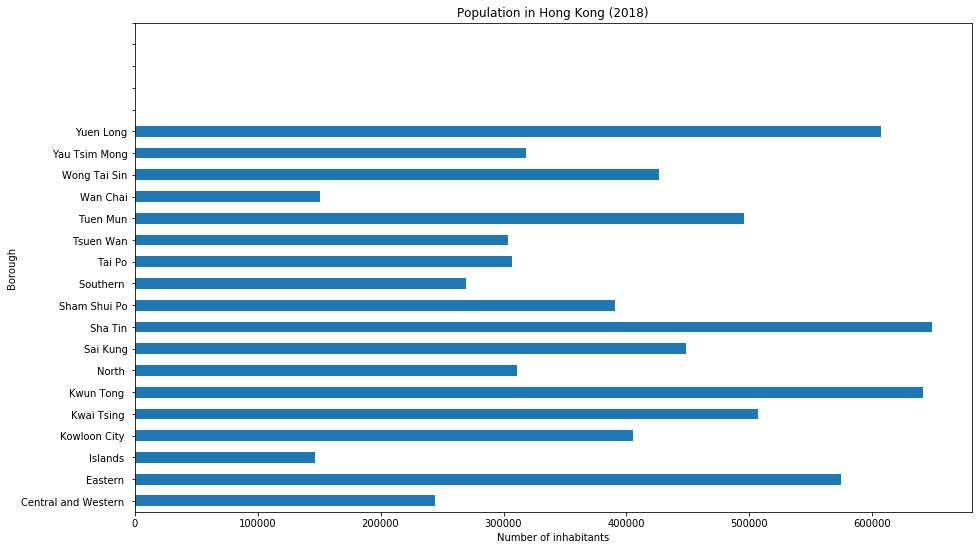

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# step 2: plot data
df[['Borough', 'Population ']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Number of inhabitants') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population in Hong Kong (2018)') # add title to the plot
plt.yticks (np.arange(23), df['Borough'])
plt.show()

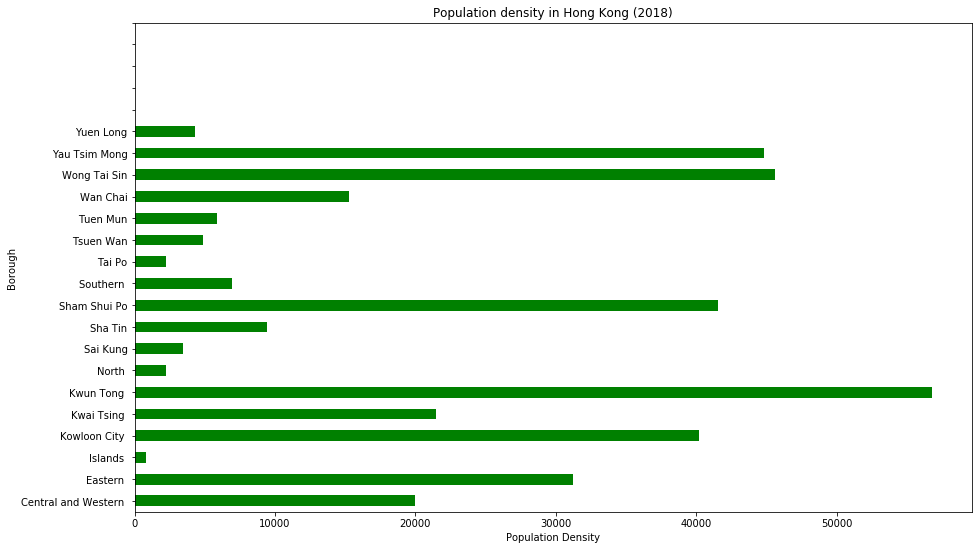

In [93]:
df[['Borough', 'Population Density']].plot(kind='barh', figsize=(15, 9), legend = None, color='green')

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Population density in Hong Kong (2018)') # add title to the plot
plt.yticks (np.arange(23), df['Borough'])
plt.show()

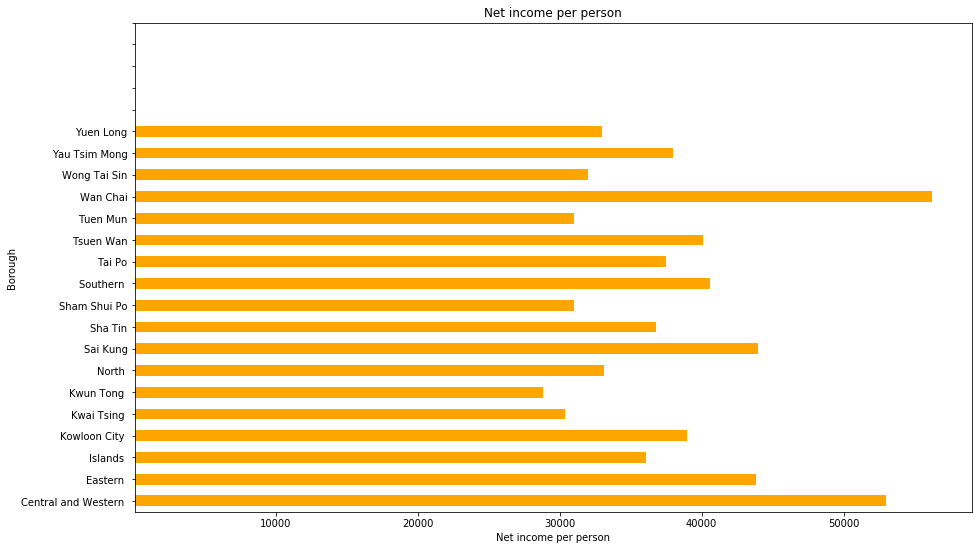

In [95]:
df[['Borough', 'Net Income Per Person']].plot(kind='barh', figsize=(15, 9), legend = None, color = 'orange')
plt.xlim(left=70)
plt.xlabel('Net income per person') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Net income per person') # add title to the plot
plt.yticks (np.arange(23), df['Borough'])
plt.show()

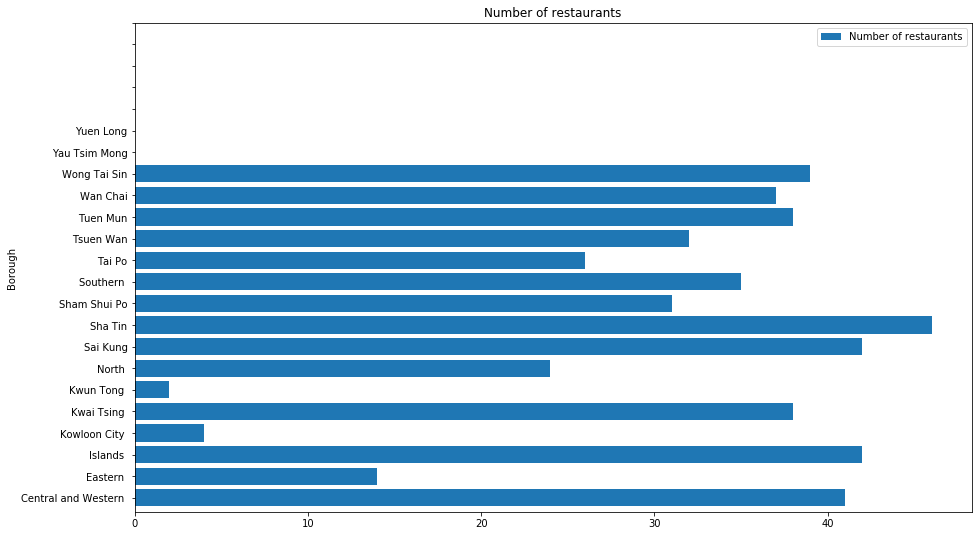

In [109]:
df2[['Borough', 'Number of restaurants']].plot(kind='barh', figsize=(15, 9), width = 0.8)

plt.ylabel('Borough') # add y-label to the plot
plt.title('Number of restaurants') # add title to the plot
plt.yticks (np.arange(23), df['Borough'])
plt.show()

In [111]:
df_clusters = df2.drop(['Borough','Latitude', 'Longitude', 'Population Density'],axis = 1)
df_clusters['Number of restaurants per 1000 people'] = df_clusters['Number of restaurants']/(df_clusters['Population ']/1000)
df_clusters = df_clusters.drop(['Population ', 'Number of restaurants'], axis = 1)
df_clusters.head()

,Net Income Per Person,Number of restaurants per 1000 people
0,53000,0.167621
1,43800,0.024369
2,39000,0.103601
3,30400,0.007888
4,28800,0.059282


In [113]:
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

array([[ 1.94054589,  1.54747286],
       [ 0.7518303 , -1.12687435],
       [ 0.13163087,  0.35230543],
       [-0.97955979, -1.4345567 ],
       [-1.18629293, -0.475081  ],
       [-0.6306976 , -1.46168229],
       [ 0.77767195, -0.58303558],
       [-0.1526272 , -0.3721698 ],
       [-0.90203486,  0.61677175],
       [-0.06218145,  0.30270103],
       [ 0.27375991,  0.57039321],
       [-0.90203486, -0.60300851],
       [ 2.35401218,  2.37712481],
       [-0.77282664,  0.08270132],
       [ 0.00242265,  0.58966615],
       [-0.64361842, -0.38272831]])

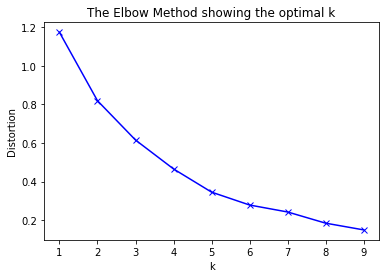

In [115]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [116]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:24]

array([1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0])

In [117]:
df2.insert(0, 'Cluster Labels', kmeans.labels_)
df2.head()

,Cluster Labels,Borough,Population,Population Density,Latitude,Longitude,Net Income Per Person,Number of restaurants
0,1,Central and Western,244600,19983.92,22.286660,114.154970,53000,41
1,0,Eastern,574500,31217.67,22.273078,114.233594,43800,14
2,2,Kowloon City,405400,40194.70,22.330160,114.189937,39000,42
3,0,Kwai Tsing,507100,21503.86,22.341007,114.104286,30400,4
4,0,Kwun Tong,641000,56779.05,22.312937,114.225610,28800,38


In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Cluster Labels'], df_clusters[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

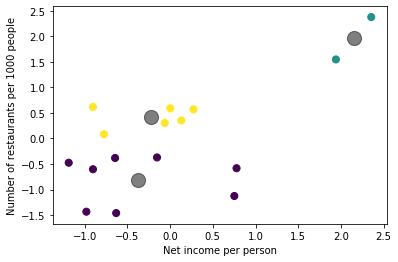

In [132]:
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters[:, 0], df_clusters[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Net income per person')
plt.ylabel('Number of restaurants per 1000 people')
plt.show()

In [134]:
df2[(df2['Cluster Labels'] == 0)]

,Cluster Labels,Borough,Population,Population Density,Latitude,Longitude,Net Income Per Person,Number of restaurants
1,0,Eastern,574500,31217.67,22.273078,114.233594,43800,14
3,0,Kwai Tsing,507100,21503.86,22.341007,114.104286,30400,4
4,0,Kwun Tong,641000,56779.05,22.312937,114.225610,28800,38
5,0,North,310800,2220.19,22.516949,114.213593,33100,2
6,0,Sai Kung,448600,3460.08,22.382249,114.272828,44000,24
7,0,Sha Tin,648200,9433.85,22.383557,114.189985,36800,42
11,0,Tuen Mun,495900,5889.38,22.391216,113.976282,31000,26
15,0,Yuen Long,607200,4297.99,22.442646,114.030434,33000,39


In [135]:
df2[(df2['Cluster Labels'] == 1)]

,Cluster Labels,Borough,Population,Population Density,Latitude,Longitude,Net Income Per Person,Number of restaurants
0,1,Central and Western,244600,19983.92,22.286660,114.154970,53000,41
12,1,Wan Chai,150900,15300.10,22.279015,114.172483,56200,32


In [136]:
df2[(df2['Cluster Labels'] == 2)]

,Cluster Labels,Borough,Population,Population Density,Latitude,Longitude,Net Income Per Person,Number of restaurants
2,2,Kowloon City,405400,40194.70,22.330160,114.189937,39000,42
8,2,Sham Shui Po,390600,41529.41,22.328190,114.160854,31000,46
9,2,Tai Po,307100,2220.35,22.449402,114.171133,37500,31
10,2,Tsuen Wan,303600,4887.38,22.371661,114.113470,40100,35
13,2,Wong Tai Sin,426200,45645.16,22.342063,114.194388,32000,38
14,2,Yau Tsim Mong,318100,44864.09,22.307404,114.165526,38000,37
